In [3]:
import pandas as pd
MOADF = pd.read_csv('Linear Regression 프로젝트데이터_박영제_03.csv')
MOADF.to_pickle("MOADF.pkl")
MOADF = pd.read_pickle("MOADF.pkl")
print(MOADF)

     shoot  meter  MOA
0       30    100    5
1       30    100    5
2       30    100    5
3       30    100    5
4       30    100    5
..     ...    ...  ...
265     13    250   15
266     14    250   15
267     13    250   15
268     13    250   15
269     14    250   15

[270 rows x 3 columns]


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
MOADF.head(5)

,shoot,meter,MOA
0,30,100,5
1,30,100,5
2,30,100,5
3,30,100,5
4,30,100,5


<AxesSubplot:ylabel='Frequency'>

<Figure size 1080x1080 with 0 Axes>

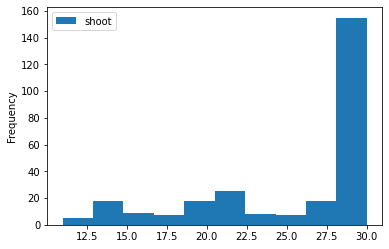

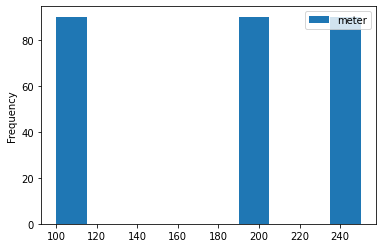

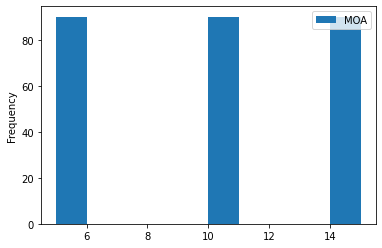

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15))
MOADF.plot(kind='hist',  y='shoot' )
MOADF.plot(kind='hist',  y='meter' )
MOADF.plot(kind='hist',  y='MOA' )

<AxesSubplot:ylabel='Frequency'>

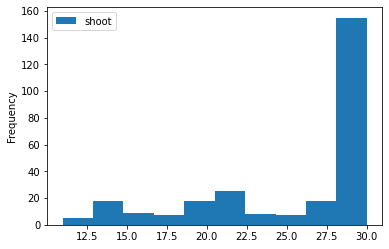

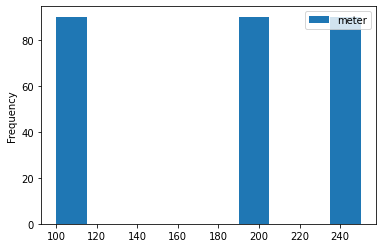

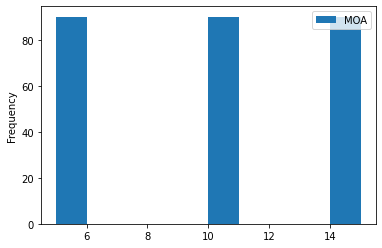

In [94]:
MOADF.plot(kind='hist',  y='shoot' )
MOADF.plot(kind='hist',  y='meter' )
MOADF.plot(kind='hist',  y='MOA' )

In [15]:
correlation = MOADF['meter'].corr(MOADF['MOA'])
print('correlation between x1 and x2: ', correlation)
correlation = MOADF['shoot'].corr(MOADF['MOA'])
print('correlation between x1 and x2: ', correlation)
correlation = MOADF['meter'].corr(MOADF['shoot'])
print('correlation between x1 and x2: ', correlation)

correlation between x1 and x2:  0.0
correlation between x1 and x2:  -0.6358507621008532
correlation between x1 and x2:  -0.5731515900930911


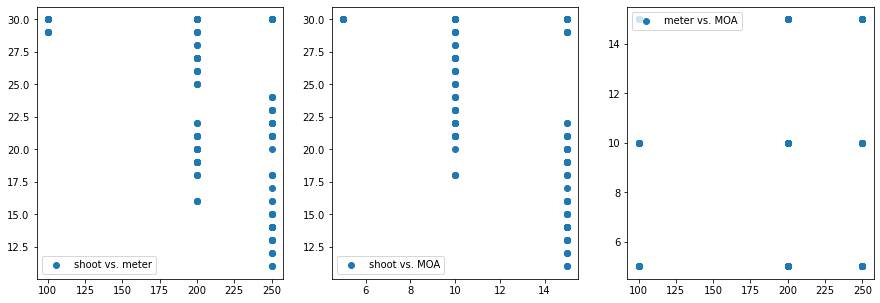

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(MOADF['meter'],MOADF['shoot'],label = 'shoot vs. meter')
ax[0].legend()
ax[1].scatter(MOADF['MOA'],MOADF['shoot'],label = 'shoot vs. MOA')
ax[1].legend()
ax[2].scatter(MOADF['meter'],MOADF['MOA'],label = 'meter vs. MOA')
ax[2].legend()
plt.show()

<Figure size 792x792 with 0 Axes>

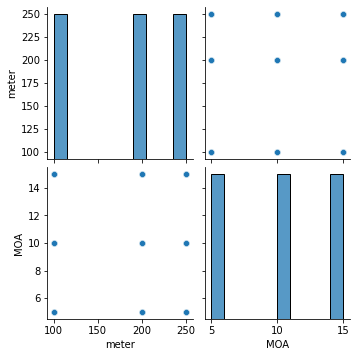

In [95]:
plt.figure(figsize=(11,11))
sns.pairplot(MOADF.drop(columns = ['shoot']))

<Figure size 792x792 with 0 Axes>

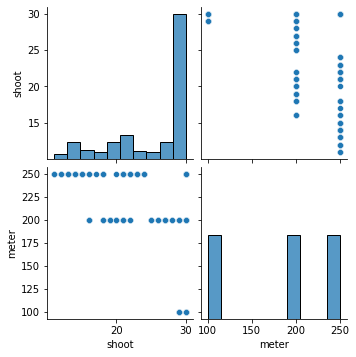

In [96]:
plt.figure(figsize=(11,11))
sns.pairplot(MOADF.drop(columns = ['MOA']))

<Figure size 792x792 with 0 Axes>

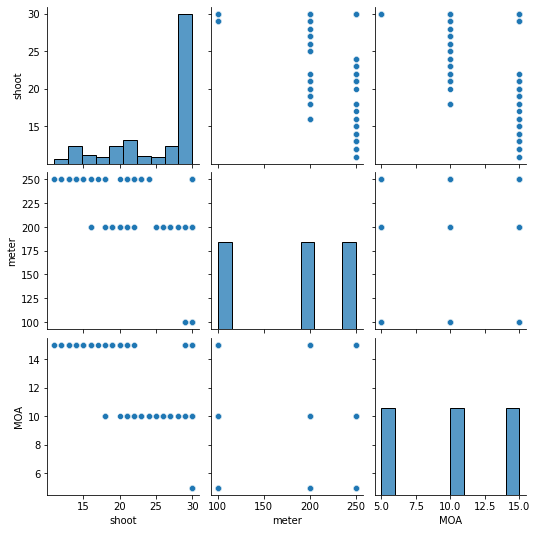

In [18]:
plt.figure(figsize=(11,11))
sns.pairplot(MOADF)

In [19]:
from sklearn.linear_model import LinearRegression 
 
data_X = MOADF.loc[:, ['meter', 'MOA']]
data_y = MOADF['shoot']
sk_lin_model = LinearRegression()
my_model = sk_lin_model.fit(data_X, data_y)

In [20]:
r2_score = my_model.score(data_X, data_y)

In [21]:
print('R2 score is ', r2_score)
print('intercept (b0) ', my_model.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': my_model.coef_}))

R2 score is  0.7328089368904734
intercept (b0)  44.48571428571429
  Predictor coefficient Name  coefficient Value
0     meter               b1          -0.053175
1       MOA               b2          -0.901111


In [22]:
import statsmodels.api as sm

X = sm.add_constant(MOADF.loc[:, ['meter', 'MOA']])
lin_model = sm.OLS(MOADF['shoot'], X)
my_model = lin_model.fit()
print(my_model.summary())
print(my_model.params)

C:\Users\redoz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\redoz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                  shoot   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     366.1
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.03e-77
Time:                        19:45:45   Log-Likelihood:                -678.89
No. Observations:                 270   AIC:                             1364.
Df Residuals:                     267   BIC:                             1375.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4857      0.724     61.455      0.0

C:\Users\redoz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [23]:
MOADF.head()

,shoot,meter,MOA
0,30,100,5
1,30,100,5
2,30,100,5
3,30,100,5
4,30,100,5


In [24]:
MOADF.shape

(270, 3)

In [25]:
corr = MOADF.corr()
corr

,shoot,meter,MOA
shoot,1.000000,-5.731516e-01,-6.358508e-01
meter,-0.573152,1.000000e+00,4.986509e-16
MOA,-0.635851,4.986509e-16,1.000000e+00


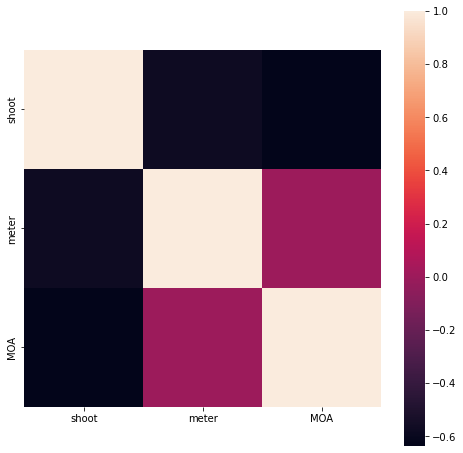

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True);

In [27]:
import numpy as np
np.random.seed(42)
train = np.random.choice(MOADF.shape[0], int(0.7 * MOADF.shape[0]), replace=False)
validation = [i for i in range(MOADF.shape[0]) if i not in train]

In [28]:
train

array([ 30, 116,  79, 127, 196, 137, 209,  45, 158, 247, 183, 268, 227,
        82, 165, 194, 226, 146, 104,  60, 221, 266,  46,  42, 185,   9,
        22, 199, 109,  24, 113,  68, 144, 224, 252,   6, 120,  67, 119,
       118,  25, 125, 244,  19,  77, 216,  90, 208,  93, 180,  15, 152,
       232, 250, 115,  33, 184, 142, 197,  37,  16,  75, 148,  10, 233,
        66, 253, 225, 182,  73,  18, 101, 195, 112, 170,  86,  55,  97,
       200,  38, 154,  84, 251,  92, 201, 126, 124,  78, 181, 111, 229,
       257, 260, 210, 193, 155,  69,   2,  76, 147, 139, 143,  96, 108,
       140, 173, 262,  74, 117,  29, 215, 192, 234, 177, 263,   5,  56,
       259, 175, 164,  65, 157,  85, 114, 245, 172,  31,  12,  35,  28,
       132,  51,  95, 167, 179,  41, 246, 176, 136,  26, 264, 141, 159,
         0, 231, 100, 241, 202,  98,  36,  61, 150, 212, 256,  11, 267,
       230,  27, 178,   4, 122,  32, 204, 162, 168, 206, 138,  62, 135,
       128, 261, 243,  70, 222,  64,  44, 186, 156,  40, 123, 15

In [29]:
validation

[1,
 3,
 7,
 8,
 13,
 14,
 17,
 20,
 21,
 34,
 43,
 48,
 49,
 50,
 52,
 53,
 54,
 57,
 58,
 59,
 63,
 71,
 72,
 80,
 83,
 87,
 88,
 89,
 91,
 99,
 102,
 103,
 105,
 106,
 107,
 110,
 121,
 129,
 130,
 131,
 133,
 134,
 145,
 149,
 151,
 160,
 161,
 163,
 166,
 169,
 171,
 174,
 187,
 188,
 189,
 190,
 191,
 198,
 203,
 205,
 207,
 211,
 214,
 218,
 219,
 220,
 223,
 228,
 235,
 236,
 237,
 238,
 239,
 242,
 248,
 249,
 254,
 255,
 258,
 265,
 269]

In [38]:
X_train = MOADF.iloc[train, :].drop(columns = ['shoot'])
y_train = np.reshape(np.array(MOADF.loc[train, 'shoot']), (-1,1))

In [39]:
X_train

,meter,MOA
30,200,5
116,100,10
79,250,5
127,200,10
196,100,15
...,...,...
81,250,5
39,200,5
240,250,15
47,200,5


In [40]:
y_train

array([[30],
       [30],
       [30],
       [27],
       [30],
       [27],
       [30],
       [30],
       [21],
       [14],
       [30],
       [13],
       [21],
       [30],
       [24],
       [30],
       [20],
       [27],
       [30],
       [30],
       [20],
       [14],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [26],
       [19],
       [15],
       [30],
       [29],
       [30],
       [30],
       [30],
       [30],
       [27],
       [15],
       [30],
       [30],
       [20],
       [30],
       [30],
       [30],
       [30],
       [30],
       [23],
       [22],
       [12],
       [30],
       [30],
       [30],
       [26],
       [30],
       [30],
       [30],
       [30],
       [25],
       [30],
       [20],
       [30],
       [12],
       [22],
       [30],
       [30],
       [30],
       [30],
       [30],
       [30],
       [23],
       [30],
       [30],

In [41]:
lin_model = LinearRegression()


In [42]:

my_model = lin_model.fit(X_train, y_train)


In [43]:
print('R2 score is ', my_model.score(X_train, y_train))
print('model coefficients:\n', my_model.coef_, '\nintercept: ',my_model.intercept_)

R2 score is  0.7281134265182319
model coefficients:
 [[-0.05261663 -0.88463488]] 
intercept:  [44.31922708]


In [44]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

the root mean square error is  2.977287968133936


In [48]:
oos = validation
X_val = MOADF.iloc[oos, :].drop(columns = ['shoot'])
y_val = MOADF.loc[oos, 'shoot']
val_pred = my_model.predict(X_val)
val_RMSE = mean_squared_error(val_pred, y_val, squared = False)
print('the validation RMSE is ', val_RMSE)

the validation RMSE is  3.0301670741506546


In [49]:
r2_score = my_model.score(X_val, y_val)
print('R2 score is ', r2_score)

R2 score is  0.7406938305689212


In [52]:
X = MOADF[['meter', 'MOA']]
y = MOADF['shoot']

In [54]:
X

,meter,MOA
0,100,5
1,100,5
2,100,5
3,100,5
4,100,5
...,...,...
265,250,15
266,250,15
267,250,15
268,250,15


In [55]:
type(y)

pandas.core.series.Series

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                                    test_size=0.3, random_state=42, shuffle=True)

In [58]:
X_train

,meter,MOA
84,250,5
251,250,15
92,100,10
201,100,15
126,200,10
...,...,...
20,100,5
188,100,15
71,250,5
106,100,10


In [59]:
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model.score(X, y))
print('model coefficients:\n', my_model.coef_, '\nintercept: ',my_model.intercept_)

R2 score is  0.7298500277483695
model coefficients:
 [-0.05287514 -0.96162288] 
intercept:  44.841850761634944


In [60]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y, my_model.predict(X), squared =False)
print('the root mean square error is ', RMSE)

the root mean square error is  3.0071146543537344


In [84]:
MOADF.head()

,shoot,meter,MOA
0,30,100,5
1,30,100,5
2,30,100,5
3,30,100,5
4,30,100,5


In [90]:
print('var\t coef\t\t\t range')
for coef, var in enumerate(MOADF.columns[1:-1]):
    print(var, '\t', round(my_model.coef_[coef], 5),\
          '\twith range ', round(float(MOADF[var].max() - MOADF[var].min()), 2))

var	 coef			 range
meter 	 -0.05288 	with range  150.0


In [88]:
scales = dict()
X = MOADF.iloc[train, 1:-1]
X

,meter
30,200
116,100
79,250
127,200
196,100
...,...
81,250
39,200
240,250
47,200


In [65]:
y = MOADF.loc[train, 'shoot']
y

30     30
116    30
79     30
127    27
196    30
       ..
81     30
39     30
240    14
47     30
94     30
Name: shoot, Length: 189, dtype: int64

In [66]:
for col in MOADF.columns[1:-1]:
    min = MOADF[col].min()
    max = MOADF[col].max()
    range = max - min
    scales.update({col : dict({'Xmin' : min, 'Xmax' : max, 'Xrange' : range})})
    X[col] = (MOADF[col] - min) / range
X

,meter
30,0.666667
116,0.000000
79,1.000000
127,0.666667
196,0.000000
...,...
81,1.000000
39,0.666667
240,1.000000
47,0.666667


In [67]:
scales = pd.DataFrame.from_dict(scales).T
print(scales)
X.describe().T

       Xmax  Xmin  Xrange
meter   250   100     150


,count,mean,std,min,25%,50%,75%,max
meter,189.0,0.557319,0.42224,0.0,0.0,0.666667,1.0,1.0


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
X = MOADF.iloc[train, 1:-1]
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.66666667],
       [0.        ],
       [1.        ],
       [0.66666667],
       [0.        ],
       [0.66666667],
       [0.        ],
       [0.66666667],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.66666667],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.66666667],
       [0.66666667],
       [0.        ],
       [1.        ],
       [0.66666667],
       [1.        ],
       [0.66666667],
       [0.66666667],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.66666667],
       [0.66666667],
       [1.        ],
       [0.        ],
       [0.66666667],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.66666667],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.66666667],
       [0.        ],
       [0.   

In [70]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0
0,0.666667
1,0.000000
2,1.000000
3,0.666667
4,0.000000
...,...
184,1.000000
185,0.666667
186,1.000000
187,0.666667


In [71]:
X_scaled.columns = MOADF.columns[1:-1]
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meter,189.0,0.557319,0.42224,0.0,0.0,0.666667,1.0,1.0


In [79]:
X_scaled.columns = MOADF.columns[1:-1]
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meter,189.0,0.557319,0.42224,0.0,0.0,0.666667,1.0,1.0
